In [2]:
from __future__ import absolute_import
from __future__ import division
# from __future__ import print_function

import torch
from torch import nn
import torch.nn.functional as F

class CNN(nn.Module):

    def __init__(self, n_channels, n_classes):
        """
        Initializes CNN object.

        Args:
          n_channels: number of input channels
          n_classes: number of classes of the classification problem
        """
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 64, 3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.maxpool1 = nn.MaxPool2d(3, stride=2, padding=1)

        self.conv2 = nn.Conv2d(64, 128, 3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.maxpool2 = nn.MaxPool2d(3, stride=2, padding=1)

        self.conv3 = nn.Conv2d(128, 256, 3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(256)

        self.conv4 = nn.Conv2d(256, 256, 3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(256)

        self.maxpool3 = nn.MaxPool2d(3, stride=2, padding=1)
        self.conv5 = nn.Conv2d(256, 512, 3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(512)

        self.conv6 = nn.Conv2d(512, 512, 3, stride=1, padding=1)
        self.bn6 = nn.BatchNorm2d(512)

        self.maxpool4 = nn.MaxPool2d(3, stride=2, padding=1)
        self.conv7 = nn.Conv2d(512, 512, 3, stride=1, padding=1)
        self.bn7 = nn.BatchNorm2d(512)

        self.conv8 = nn.Conv2d(512, 512, 3, stride=1, padding=1)
        self.bn8 = nn.BatchNorm2d(512)

        self.maxpool5 = nn.MaxPool2d(3, stride=2, padding=1)
        self.avgpool = nn.AvgPool2d(1, stride=1, padding=0)
        self.linear = nn.Linear(512, 10)
        print("init finish")

    def forward(self, x):
        """
        Performs forward pass of the input.

        Args:
          x: input to the network
        Returns:
          out: outputs of the network
        """
        # print(x.size())
        x = self.conv1(x)
        # print("conv1", x.size())
        x = self.bn1(x)
        # print("bn1", x.size())
        x = self.maxpool1(F.relu(x))
        # print("maxpool1", x.size())
        x = self.conv2(x)
        # print("conv2", x.size())
        x = self.bn2(x)
        # print("bn2", x.size())
        x = self.maxpool2(F.relu(x))
        # print("maxpool2", x.size())
        x = self.conv3(x)
        # print("conv3", x.size())
        x = self.bn3(x)
        # print("bn3", x.size())
        x = self.conv4(F.relu(x))
        # print("conv4", x.size())
        x = self.bn4(x)
        # print("bn4", x.size())
        x = self.maxpool3(F.relu(x))
        # print("maxpool3", x.size())
        x = self.conv5(x)
        # print("conv5", x.size())
        x = self.bn5(x)
        # print("bn5", x.size())
        x = self.conv6(F.relu(x))
        # print("conv6", x.size())
        x = self.bn6(x)
        # print("bn6", x.size())
        x = self.maxpool4(F.relu(x))
        # print("maxpool4", x.size())
        x = self.conv7(x)
        # print("conv7", x.size())
        x = self.bn7(x)
        # print("bn7", x.size())
        x = self.conv8(F.relu(x))
        # print("conv8", x.size())
        x = self.bn8(x)
        # print("bn8", x.size())
        x = self.maxpool5(F.relu(x))
        # print("maxpool5", x.size())
        x = self.avgpool(x)
        # print("avgpool", x.size())
        x = torch.squeeze(x)
        # print("squeeze", x.size())
        x = self.linear(x)
        # print("linear", x.size())
        return x

Files already downloaded and verified
data loaded
init finish
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Done training.
finish


D:\anaconda\lib\site-packages\ipykernel_launcher.py:82: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


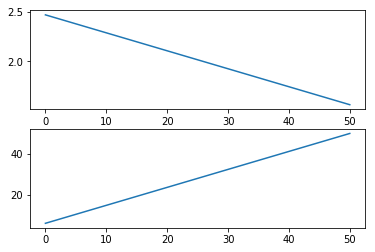

In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import numpy as np
import os

import torch

from operator import itemgetter
from cnn_model import CNN
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from torchvision.transforms import transforms
from torch import nn
import matplotlib.pyplot as plt


# Default constants
LEARNING_RATE_DEFAULT = 1e-4
BATCH_SIZE_DEFAULT = 32
MAX_EPOCHS_DEFAULT = 5000
EVAL_FREQ_DEFAULT = 500
OPTIMIZER_DEFAULT = 'ADAM'
DATA_DIR_DEFAULT = './data'


FLAGS = None

def accuracy(predictions, targets):
    """
    Computes the prediction accuracy, i.e., the average of correct predictions
    of the network.
    Args:
        predictions: 2D float array of size [number_of_data_samples, n_classes]
        labels: 2D int array of size [number_of_data_samples, n_classes] with one-hot encoding of ground-truth labels
    Returns:
        accuracy: scalar float, the accuracy of predictions.
    """
    return accuracy

def train(config):
    """
    Performs training and evaluation of MLP model.
    NOTE: You should the model on the whole test set each eval_freq iterations.
    """
    # YOUR TRAINING CODE GOES HERE
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    train_data = CIFAR10(DATA_DIR_DEFAULT, train=True, download=True, transform=transform)
    data_loader = DataLoader(train_data, batch_size=config.batch_size)
    print("data loaded")
    model = CNN(3, 10)

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    
    x_axis = list()
    loss_list =list()
    accuracys = list()
    
    for step, (batch_inputs, batch_targets) in enumerate(data_loader):
        print(step)
        hit = 0
        n, dim, _, __ = batch_inputs.size()

        # for i in range(n):
        #     temp_x = torch.unsqueeze(batch_inputs[i], 0)
        #     print(temp_x.size())
        #     y_pre = model.forward(temp_x)
        y_pre = model.forward(batch_inputs)
        for i in range(n):
            y_ev, _ = max(enumerate(y_pre[i]), key=itemgetter(1))
            y = batch_targets[i].item()
            if y_ev == y:
                hit += 1

        torch.nn.utils.clip_grad_norm(model.parameters(), max_norm=10)

        # Add more code here ...
        loss = criterion(y_pre, batch_targets)  # fixme
        accuracy = hit / n * 100  # fixme

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if step % config.eval_freq == 0:
            x_axis.append(step)
            loss_list.append(loss.item())
            accuracys.append(accuracy)

        if step == config.max_steps - 1:
            # If you receive a PyTorch data-loader error, check this bug report:
            # https://github.com/pytorch/pytorch/pull/9655
            fig = plt.figure()
            loss_fig = plt.subplot(2, 1, 1)
            accuracy_fig = plt.subplot(2, 1, 2)
            
            loss_fig.plot(x_axis, loss_list)
            accuracy_fig.plot(x_axis, accuracys)
            break

    print('Done training.')


def main(config):
    """
    Main function
    """
    # print(torch.cuda.is_available())
    torch.device("cuda")
    train(config)
    print("finish")

if __name__ == '__main__':

    # Command line arguments
    parser = argparse.ArgumentParser()
    parser.add_argument('--learning_rate', type = float, default = LEARNING_RATE_DEFAULT,
                      help='Learning rate')
    parser.add_argument('--max_steps', type = int, default = MAX_EPOCHS_DEFAULT,
                      help='Number of steps to run trainer.')
    parser.add_argument('--batch_size', type = int, default = BATCH_SIZE_DEFAULT,
                      help='Batch size to run trainer.')
    parser.add_argument('--eval_freq', type=int, default=EVAL_FREQ_DEFAULT,
                        help='Frequency of evaluation on the test set')
    parser.add_argument('--data_dir', type = str, default = DATA_DIR_DEFAULT,
                      help='Directory for storing input data')
    FLAGS, unparsed = parser.parse_known_args()
    config = parser.parse_args(args=list())
    main(config)

The first figure is loss.

The second figure is accuracy.

Due to the hardware performance, I can't train the mpl with the default parameters even if use the GPU. 
However, I train it 100 iterations, the performance is efficienct. 

